In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

print("Features: ", feature_names)
print("X shape: ", "y shapre: ", y.shape)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X shape:  y shapre:  (442,)


Exploratory Data Analysis

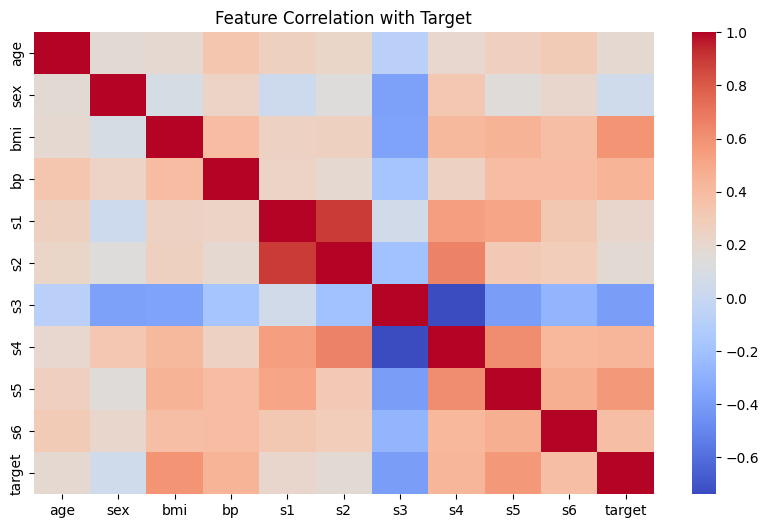

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.head()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()

Data Preprocessing

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Implementation

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1),
    "ElasticNet (L1+L2)": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}

Training and Predictions

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression -> MSE: 2900.1936, R²: 0.4526
Ridge (L2) -> MSE: 2892.0146, R²: 0.4541
Lasso (L1) -> MSE: 2884.6243, R²: 0.4555
ElasticNet (L1+L2) -> MSE: 2866.4613, R²: 0.4590


Evaluation Metrics

In [10]:
results_df = pd.DataFrame(results).T
results_df

,MSE,R²
Linear Regression,2900.193628,0.452603
Ridge (L2),2892.014566,0.454147
Lasso (L1),2884.624289,0.455541
ElasticNet (L1+L2),2866.461255,0.458970


Visualisation - Coefficients

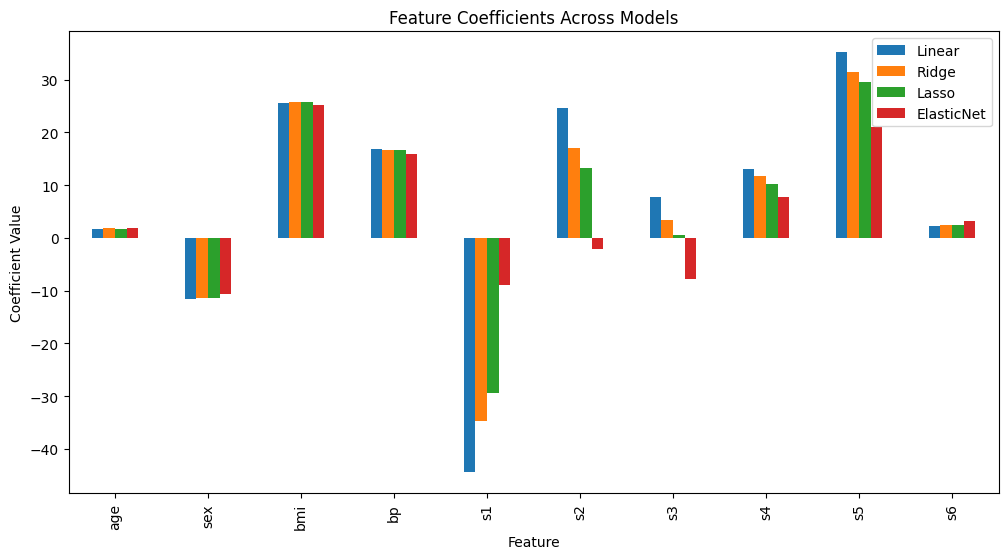

In [11]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Linear": models["Linear Regression"].coef_,
    "Ridge": models["Ridge (L2)"].coef_,
    "Lasso": models["Lasso (L1)"].coef_,
    "ElasticNet": models["ElasticNet (L1+L2)"].coef_
})

coef_df.set_index("Feature").plot(kind="bar", figsize=(12,6))
plt.title("Feature Coefficients Across Models")
plt.ylabel("Coefficient Value")
plt.show()